<a href="https://colab.research.google.com/github/javonnii/COVID19-data/blob/master/Exploring_Covid_19_eu_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data exploration with Pandas

In [0]:
# imports
import pandas as pd
import io
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.ticker as ticker

### COVID-19 data from data.europa.eu
* https://data.europa.eu/euodp/en/data/dataset/covid-19-coronavirus-data

In [0]:
from google.colab import files
uploaded = files.upload()

Saving covid_19.csv to covid_19.csv


In [0]:
df = pd.read_csv(io.BytesIO(uploaded['covid_19.csv']))

In [0]:
df.head(10)

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continentExp
0,03/05/2020,3,5,2020,134,4,Afghanistan,AF,AFG,37172386.0,Asia
1,02/05/2020,2,5,2020,164,4,Afghanistan,AF,AFG,37172386.0,Asia
2,01/05/2020,1,5,2020,222,4,Afghanistan,AF,AFG,37172386.0,Asia
3,30/04/2020,30,4,2020,122,0,Afghanistan,AF,AFG,37172386.0,Asia
4,29/04/2020,29,4,2020,124,3,Afghanistan,AF,AFG,37172386.0,Asia
5,28/04/2020,28,4,2020,172,0,Afghanistan,AF,AFG,37172386.0,Asia
6,27/04/2020,27,4,2020,68,10,Afghanistan,AF,AFG,37172386.0,Asia
7,26/04/2020,26,4,2020,112,4,Afghanistan,AF,AFG,37172386.0,Asia
8,25/04/2020,25,4,2020,70,1,Afghanistan,AF,AFG,37172386.0,Asia
9,24/04/2020,24,4,2020,105,2,Afghanistan,AF,AFG,37172386.0,Asia


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14658 entries, 0 to 14657
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   dateRep                  14658 non-null  object 
 1   day                      14658 non-null  int64  
 2   month                    14658 non-null  int64  
 3   year                     14658 non-null  int64  
 4   cases                    14658 non-null  int64  
 5   deaths                   14658 non-null  int64  
 6   countriesAndTerritories  14658 non-null  object 
 7   geoId                    14608 non-null  object 
 8   countryterritoryCode     14486 non-null  object 
 9   popData2018              14507 non-null  float64
 10  continentExp             14658 non-null  object 
dtypes: float64(1), int64(5), object(5)
memory usage: 1.2+ MB


In [0]:
# get the dimensions of the dataframe
df.shape

(14658, 11)

In [0]:
df.columns

Index(['dateRep', 'day', 'month', 'year', 'cases', 'deaths',
       'countriesAndTerritories', 'geoId', 'countryterritoryCode',
       'popData2018', 'continentExp'],
      dtype='object')

In [0]:
df.describe()

,day,month,year,cases,deaths,popData2018
count,14658.000000,14658.000000,14658.000000,14658.000000,14658.000000,1.450700e+04
mean,16.189589,3.127916,2019.995429,231.181948,16.599263,5.469272e+07
std,9.075428,1.280989,0.067456,1606.288464,124.291904,1.826093e+08
min,1.000000,1.000000,2019.000000,-1430.000000,0.000000,1.000000e+03
25%,8.000000,2.000000,2020.000000,0.000000,0.000000,2.781677e+06
50%,17.000000,3.000000,2020.000000,1.000000,0.000000,9.942334e+06
75%,24.000000,4.000000,2020.000000,30.000000,1.000000,3.717239e+07
max,31.000000,12.000000,2020.000000,48529.000000,4928.000000,1.392730e+09


In [0]:
df.tail(10)

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continentExp
14648,30/03/2020,30,3,2020,0,0,Zimbabwe,ZW,ZWE,14439018.0,Africa
14649,29/03/2020,29,3,2020,2,0,Zimbabwe,ZW,ZWE,14439018.0,Africa
14650,28/03/2020,28,3,2020,2,0,Zimbabwe,ZW,ZWE,14439018.0,Africa
14651,27/03/2020,27,3,2020,0,0,Zimbabwe,ZW,ZWE,14439018.0,Africa
14652,26/03/2020,26,3,2020,1,0,Zimbabwe,ZW,ZWE,14439018.0,Africa
14653,25/03/2020,25,3,2020,0,0,Zimbabwe,ZW,ZWE,14439018.0,Africa
14654,24/03/2020,24,3,2020,0,1,Zimbabwe,ZW,ZWE,14439018.0,Africa
14655,23/03/2020,23,3,2020,0,0,Zimbabwe,ZW,ZWE,14439018.0,Africa
14656,22/03/2020,22,3,2020,1,0,Zimbabwe,ZW,ZWE,14439018.0,Africa
14657,21/03/2020,21,3,2020,1,0,Zimbabwe,ZW,ZWE,14439018.0,Africa


In [0]:
# df.to_excel('filename.xls')

### Notation Methods

In [0]:
# dot notation for accessing fields/columns in your data
df.dateRep.head(10)


0    03/05/2020
1    02/05/2020
2    01/05/2020
3    30/04/2020
4    29/04/2020
5    28/04/2020
6    27/04/2020
7    26/04/2020
8    25/04/2020
9    24/04/2020
Name: dateRep, dtype: object

In [0]:
df.dateRep[500]

'01/04/2020'

In [0]:
# bracket notation
df['dateRep'].head(10)

0    03/05/2020
1    02/05/2020
2    01/05/2020
3    30/04/2020
4    29/04/2020
5    28/04/2020
6    27/04/2020
7    26/04/2020
8    25/04/2020
9    24/04/2020
Name: dateRep, dtype: object

In [0]:
df['dateRep'][500]

'01/04/2020'

How many unique countries have reported?

In [0]:
df['countriesAndTerritories'].describe()

count           14658
unique            209
top       South_Korea
freq              125
Name: countriesAndTerritories, dtype: object

What are the unique countries that have reported?

In [0]:
countries_reported = df['countriesAndTerritories'].unique()

for country_name in countries_reported:
    print(' ', country_name) 

  Afghanistan
  Albania
  Algeria
  Andorra
  Angola
  Anguilla
  Antigua_and_Barbuda
  Argentina
  Armenia
  Aruba
  Australia
  Austria
  Azerbaijan
  Bahamas
  Bahrain
  Bangladesh
  Barbados
  Belarus
  Belgium
  Belize
  Benin
  Bermuda
  Bhutan
  Bolivia
  Bonaire, Saint Eustatius and Saba
  Bosnia_and_Herzegovina
  Botswana
  Brazil
  British_Virgin_Islands
  Brunei_Darussalam
  Bulgaria
  Burkina_Faso
  Burundi
  Cambodia
  Cameroon
  Canada
  Cape_Verde
  Cases_on_an_international_conveyance_Japan
  Cayman_Islands
  Central_African_Republic
  Chad
  Chile
  China
  Colombia
  Comoros
  Congo
  Costa_Rica
  Cote_dIvoire
  Croatia
  Cuba
  Curaçao
  Cyprus
  Czechia
  Democratic_Republic_of_the_Congo
  Denmark
  Djibouti
  Dominica
  Dominican_Republic
  Ecuador
  Egypt
  El_Salvador
  Equatorial_Guinea
  Eritrea
  Estonia
  Eswatini
  Ethiopia
  Falkland_Islands_(Malvinas)
  Faroe_Islands
  Fiji
  Finland
  France
  French_Polynesia
  Gabon
  Gambia
  Georgia
  Germany
  Ghana


### Slice notation for dataframes

In [0]:
df[3000:3005]

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continentExp
3000,01/05/2020,1,5,2020,296,15,Colombia,CO,COL,49648685.0,America
3001,30/04/2020,30,4,2020,262,9,Colombia,CO,COL,49648685.0,America
3002,29/04/2020,29,4,2020,352,16,Colombia,CO,COL,49648685.0,America
3003,28/04/2020,28,4,2020,218,10,Colombia,CO,COL,49648685.0,America
3004,27/04/2020,27,4,2020,237,10,Colombia,CO,COL,49648685.0,America


In [0]:
subset_df = df.loc[2995:3005, ['dateRep', 'countriesAndTerritories', 'cases', 'deaths']]

subset_df

,dateRep,countriesAndTerritories,cases,deaths
2995,02/01/2020,China,0,0
2996,01/01/2020,China,0,0
2997,31/12/2019,China,27,0
2998,03/05/2020,Colombia,279,10
2999,02/05/2020,Colombia,499,21
3000,01/05/2020,Colombia,296,15
3001,30/04/2020,Colombia,262,9
3002,29/04/2020,Colombia,352,16
3003,28/04/2020,Colombia,218,10
3004,27/04/2020,Colombia,237,10


### Masking/Filtering

In [0]:
peru_mask = df['countriesAndTerritories'] == 'Peru'

peru_mask

0        False
1        False
2        False
3        False
4        False
         ...  
14653    False
14654    False
14655    False
14656    False
14657    False
Name: countriesAndTerritories, Length: 14658, dtype: bool

In [0]:
len(peru_mask)

14658

In [0]:
# df_peru = df[peru_mask]
df_peru = df[df['countriesAndTerritories'] == 'Peru']

In [0]:
df_peru.head(5)

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continentExp
10726,03/05/2020,3,5,2020,2075,76,Peru,PE,PER,31989256.0,America
10727,02/05/2020,2,5,2020,3483,73,Peru,PE,PER,31989256.0,America
10728,01/05/2020,1,5,2020,3045,108,Peru,PE,PER,31989256.0,America
10729,30/04/2020,30,4,2020,2741,89,Peru,PE,PER,31989256.0,America
10730,29/04/2020,29,4,2020,2491,72,Peru,PE,PER,31989256.0,America


In [0]:
df_peru.describe()

,day,month,year,cases,deaths,popData2018
count,57.000000,57.000000,57.0,57.000000,57.000000,57.0
mean,16.456140,3.631579,2020.0,746.210526,21.052632,31989256.0
std,8.756773,0.586502,0.0,984.329100,26.978444,0.0
min,1.000000,3.000000,2020.0,0.000000,0.000000,31989256.0
25%,10.000000,3.000000,2020.0,29.000000,0.000000,31989256.0
50%,17.000000,4.000000,2020.0,181.000000,9.000000,31989256.0
75%,24.000000,4.000000,2020.0,1172.000000,37.000000,31989256.0
max,31.000000,5.000000,2020.0,3683.000000,108.000000,31989256.0


How many days has Peru reported?

In [0]:
len(df_peru)

57

How many cases have been reported in Peru?

In [0]:
sum(df_peru['cases'])

42534

How many deaths have been reported in Peru?

In [0]:
sum(df_peru['deaths'])

1200

In [0]:
df_peru['deaths'].describe()

count     57.000000
mean      21.052632
std       26.978444
min        0.000000
25%        0.000000
50%        9.000000
75%       37.000000
max      108.000000
Name: deaths, dtype: float64

When did Peru last report?
* this is tricky via indexing but we can rely on the order of the data in this case
* we can simply use `df_peru.head(1)` and look at the most recent

In [0]:
df_peru.dateRep[10726]

'03/05/2020'

What is the population of peru?

In [0]:
peru_population = int(max(df_peru['popData2018']))
peru_population

31989256

What is the population of Anguilla?

In [0]:
df_anguilla = df[df['countriesAndTerritories'] == 'Anguilla']

df_anguilla['popData2018']

385   NaN
386   NaN
387   NaN
388   NaN
389   NaN
390   NaN
391   NaN
392   NaN
393   NaN
394   NaN
395   NaN
396   NaN
397   NaN
398   NaN
399   NaN
400   NaN
401   NaN
402   NaN
403   NaN
404   NaN
405   NaN
406   NaN
407   NaN
408   NaN
409   NaN
410   NaN
411   NaN
412   NaN
413   NaN
414   NaN
415   NaN
416   NaN
417   NaN
418   NaN
419   NaN
420   NaN
421   NaN
422   NaN
Name: popData2018, dtype: float64

## Let's explore through plotting all the countries
* daily cases/deaths plot
* cumulative plot

In [0]:
def cumulate(some_list):
    output = []
    accum = 0

    for num in some_list:
        accum += num
        output.append(accum)

    return output

In [0]:
def plot_cases_deaths(df_to_check, country, cumulative=False):
    df_country = df_to_check[df_to_check['countriesAndTerritories'] == country]

    # casting to lists (for ed purposes)
    cases_country = list(df_country['cases'][::-1])
    deaths_country = list(df_country['deaths'][::-1])
    dates_country = list(df_country['dateRep'][::-1])

    if str(max(df_country['popData2018'])) == 'nan':
        country_population = 'not in dataset'
    else:
        country_population = int(max(df_country['popData2018']))

    if cumulative == True:
        cases_country = cumulate(cases_country)
        deaths_country = cumulate(deaths_country)

    max_deaths = max(deaths_country)
    max_cases  = max(cases_country)
    
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)

    ax.plot(dates_country, cases_country, color='blue')
    ax.plot(dates_country, deaths_country, color='red')

    ax.set_ylabel('counts')
    ax.set_xlabel(f'Up to:{dates_country[-1]}, source: https://data.europa.eu/')
    ax.set_xticklabels(dates_country, rotation=80)


    n = len(dates_country)
    if n > 10 and n < 30:
        n = int(n / 3)
    elif n >= 30 and n < 60:
        n = int(n / 6)
    elif n >= 60 and n < 100:
        n = int(n / 9)
    
    if len(dates_country) > 10:
        [l.set_visible(False) for (i,l) in enumerate(ax.xaxis.get_ticklabels()[0:-1]) if i % n != 0]



    country_ = country.replace('_', ' ')
    plt.suptitle(f'{country_} Reported {len(df_country)} days, COVID-19', fontsize=14)

    if cumulative == False:
        plt.title(f'max cases in 1 day: {max_cases}, max deaths in 1 day: {max_deaths}, Pop: {country_population}')
    else:
        plt.title(f'total cases: {max_cases}, total_deaths: {max_deaths}, Pop: {country_population}')

    if cumulative == False:
        blue = mpatches.Patch(color='blue', label='Daily cases')
        red = mpatches.Patch(color='red', label='Daily deaths')
    else:
        blue = mpatches.Patch(color='blue', label='Cumulative cases')
        red = mpatches.Patch(color='red', label='Cumulative deaths')

    plt.legend(handles=[blue, red])

    plt.show()
    

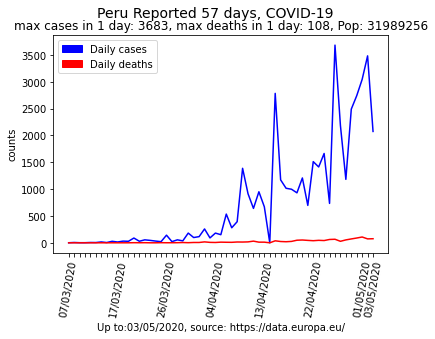

In [0]:
plot_cases_deaths(df, 'Peru', cumulative=False)

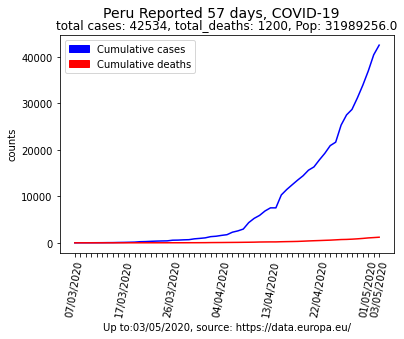

In [0]:
plot_cases_deaths(df, 'Peru', cumulative=True)

## Plot all countries

In [0]:
for country_name in df['countriesAndTerritories'].unique():
    plot_cases_deaths(df, country_name, cumulative=False)
    plot_cases_deaths(df, country_name, cumulative=True)

## Two sample Z-tests for Population Proportion

A two sample z-test for population proportion can help one determine whether or not the difference between two population proportions are different to a statistically significant level. In this case, we will be making comparisons between the overall death rates across a nation's population. While we will be able to make these comparisons. 

__*NOTE:*__<br>
It is important to note, that the conclusions we reach merely determine whether the difference is statistically different, and we cannot necessarily contribute the differences to any specific factor. However, this can help us do some "data storytelling," where a statistician is able to hypothesize what __*might*__ be causing the differences, but much further analysis would be necessary to come to any sort of causitive conclusions.

<br><br><br><br>

### State the Hypotheses

As with all hypothesis testing, it is first important to identify what exactly we are testing. In this case, $P_1$ represents the population proportion of the first nation-state, and $P_2$ represents the proportion from the second nation-state. See the Possible Hypotheses that will be tested below:
<br><br>

$$ \text{Null Hypothesis: } H_0: p_1 = p_2 $$
$$ \text{Null Hypothesis: } H_0: p_1 - p_2 = 0  $$ <br>
$$ \text{Alternative Hypothesis #1: } H_a: p_1 > p_2  $$
$$ \text{Alternative Hypothesis #2: } H_a: p_1 < p_2 $$
$$ \text{Alternative Hypothesis #3: } H_a: p_1 \neq p_2 $$

In this experiment, we will be using the first two alternative hypothesis, if we are able to see the rate of death is greater in $P_1$ than in $P2$, use __*Alternative Hypothesis #1*__; alternatively, if the death rate is lesser in $P_1$ than in $P_2$, use __*Alternative Hypothesis #2*__. Use $\alpha = 0.05$.
<br><br><br><br>


### Decision Rule
It is necessary to define a __*decision rule*__, where one specifies the level of confidence necessary to reject the null hypothesis. Typical values for this threshold are $ \alpha = 0.01, \ \alpha = 0.05, \text{ or}, \ \alpha = 0.10 $, in this case, use $\alpha = 0.05$. 

This value, represented by the lower-case greek letter alpha, is in essence a "confidence level". This is to say that we need to be confident that the difference in population proportions are not due to chance (sampling error), in this case with $ \alpha = 0.05 $, one can be sure that there is less than a $0.05$ probability that the differences are due to chance. Here, it is reasonable to choose a somewhat strict rule, as we are dealing with a population, as opposed to a sample.

The value that is compared against the alpha, is the p-value which is calculated by using a __*Z-score*__. To make the decision, the null hypothesis is always chosen unless the p-value is less than the alpha, in which case, the null hypothesis is rejected and the alternative hypothesis is accepted.
<br><br><br><br>

### Calculate the Z-score
The Z-score is a standard score that describes the number of standard deviations away from the mean. The formula for calculating the Z-score of a two-sample population proportion is below:

$$ Z = \frac{(\hat{p}_1 - \hat{p}_2) - 0}{\sqrt{\hat{p}(1 - \hat{p})(\frac{1}{n_1} + \frac{1}{n_2})}} $$

__*Note:*__ 
That there are some variables/notations which need to be explained:

$ \hat{p} $ is the overall proportion (rate of death), in essence a weighted average of both populations<br>
$ \hat{p}_1 $ is the proportion (rate of death) from the first population<br>
$ \hat{p}_2 $ is the proportion (rate of death) from the second population<br>
$ n_1 $ is the number of "samples" from the first population, in this case the reported population<br>
$ n_2 $ is the number of "samples" from the second population, in this case the reported population<br>

The Z-score can be used to find a __*p-value*__. The p-value tells us the probability that the difference is caused by chance, if the actual proportions were equal, as is stated in the Null Hypothesis.

We will be using the module `statsmodels` to help us make these calculations, there is a two sample Z-test for proportion built into the module, and it will give us both a Z-score and p-value and we can make conclusions about the hypothesis test. 

## Extract the data necessary for the hypothesis tests
### Aggregate the dataframe, showing total deaths by country

In [0]:
aggregate_df_deaths = df.groupby(['countriesAndTerritories']).sum()[['deaths']]

aggregate_df_deaths

,deaths
countriesAndTerritories,
Afghanistan,72
Albania,31
Algeria,459
Andorra,44
Angola,2
...,...
Vietnam,0
Western_Sahara,0
Yemen,2


### Aggregate the dataframe, getting the average population
__*Note:*__ All population data is the same for each country

In [0]:
aggregate_df_pop = df.groupby(['countriesAndTerritories']).mean()[['popData2018']]

aggregate_df_pop

,popData2018
countriesAndTerritories,
Afghanistan,37172386.0
Albania,2866376.0
Algeria,42228429.0
Andorra,77006.0
Angola,30809762.0
...,...
Vietnam,95540395.0
Western_Sahara,NaN
Yemen,28498687.0


### Put the dataframes together by concatenation

In [0]:
aggregate_df = pd.concat([aggregate_df_deaths, aggregate_df_pop], axis=1)

aggregate_df.head()

,deaths,popData2018
countriesAndTerritories,,
Afghanistan,72,37172386.0
Albania,31,2866376.0
Algeria,459,42228429.0
Andorra,44,77006.0
Angola,2,30809762.0


### Create a column for deaths in terms of proportion of population

In [0]:
aggregate_df = aggregate_df.assign(death_by_pop=aggregate_df['deaths'] / aggregate_df['popData2018'])

aggregate_df.head()

,deaths,popData2018,death_by_pop
countriesAndTerritories,,,
Afghanistan,72,37172386.0,1.936922e-06
Albania,31,2866376.0,1.081505e-05
Algeria,459,42228429.0,1.086945e-05
Andorra,44,77006.0,5.713840e-04
Angola,2,30809762.0,6.491449e-08


### Choose some countries of interest
__*Note*__: Countries listed are those who have been widely reported to have either 'good' or 'bad' responses from their government.

In [0]:
lim_aggregate_df = aggregate_df.loc[[
                                     'United_States_of_America',
                                     'South_Korea',
                                     'China',
                                     'Germany',
                                     'Taiwan', 
                                     'Sweden', 
                                     'Italy', 
                                     'United_Kingdom',
                                     'France', 
                                     'Singapore',
                                     'New_Zealand',
                                    ]]

print(lim_aggregate_df)

                          deaths   popData2018  death_by_pop
countriesAndTerritories                                     
United_States_of_America   66385  3.271674e+08  2.029083e-04
South_Korea                  250  5.163526e+07  4.841653e-06
China                       4637  1.392730e+09  3.329432e-06
Germany                     6649  8.292792e+07  8.017806e-05
Taiwan                         6  2.378045e+07  2.523081e-07
Sweden                      2669  1.018318e+07  2.620990e-04
Italy                      28710  6.043128e+07  4.750851e-04
United_Kingdom             28131  6.648899e+07  4.230926e-04
France                     24760  6.698724e+07  3.696226e-04
Singapore                     17  5.638676e+06  3.014892e-06
New_Zealand                   20  4.885500e+06  4.093747e-06


### Use the statsmodels module to complete the Z-test for USA vs. South Korea

In [0]:
from statsmodels.stats.proportion import proportions_ztest
import numpy as np

num_obs = np.array([lim_aggregate_df.loc['United_States_of_America'].popData2018,
                    lim_aggregate_df.loc['South_Korea'].popData2018])

num_deaths = np.array([lim_aggregate_df.loc['United_States_of_America'].deaths,
                       lim_aggregate_df.loc['South_Korea'].deaths])

stat, pval = proportions_ztest(num_deaths, num_obs)

print(f'Z-Statistic: {stat:.5f} ', f'\tp-value: {pval:.5f}')

Z-Statistic: 99.73708  	p-value: 0.00000


#### Hypotheses and Conclusion of the Hypothesis Test

$$ H_0: p_{United \ States} = p_{South \ Korea} $$
$$ H_a: p_{United \ States} > p_{South \ Korea} $$

With a Z-score of 99.74, and a p-value of 0, the null hypothesis is rejected and the alternative hypothesis is accepted.

There is a story to be told here, but one cannot imply causation . . . although my hypothesis is that the United States' has largely led an ineffective response to the pandemic, causing a larger proportion of deaths, there is not enough evidence to glean causation.

### Now, do the same for New Zealand vs. South Korea

In [0]:
num_obs = np.array([lim_aggregate_df.loc['New_Zealand'].popData2018,
                    lim_aggregate_df.loc['South_Korea'].popData2018])

num_deaths = np.array([lim_aggregate_df.loc['New_Zealand'].deaths,
                       lim_aggregate_df.loc['South_Korea'].deaths])

stat, pval = proportions_ztest(num_deaths, num_obs)

print(f'Z-Statistic: {stat:.5f} ', f'\tp-value: {pval:.5f}')

Z-Statistic: -0.72293  	p-value: 0.46973


#### Hypotheses and Conclusion of the Hypothesis Test

$$ H_0: p_{New \ Zealand} = p_{South \ Korea} $$
$$ H_a: p_{New \ Zealand} < p_{South \ Korea} $$

With a p-value of 0.46973, there is not enough evidence to reject the null hypothesis. 
<br><br><br><br><br>

In [0]:
from itertools import combinations

country_lst = list(lim_aggregate_df.index)

list(combinations(country_lst, 2))[0:3]

[('United_States_of_America', 'South_Korea'),
 ('United_States_of_America', 'China'),
 ('United_States_of_America', 'Germany')]

In [0]:
def pop_hypothesis_test(df):
    all_combs = list(combinations(df.index, 2))

    for comb in all_combs:
        num_obs = np.array([df.loc[comb[0]].popData2018, 
                           df.loc[comb[1]].popData2018])

        num_deaths = np.array([df.loc[comb[0]].deaths, 
                              df.loc[comb[1]].deaths])

        print(f'Countries: {comb[0]} vs. {comb[1]}:'.replace("_", " "))
        print(f'\tProportions: {df.loc[comb[0]].death_by_pop:.8f}, ' +
              f'{df.loc[comb[1]].death_by_pop:.8f}')
        
        stat, pval = proportions_ztest(num_deaths, num_obs)

        print(f'\tZ-statistic: {stat:.4f} ', f'\n\tp-value: {pval:.6f}')

        if pval < 0.05 and stat > 0:
            print('\tHypothesis: Alternative - p1 is greater than p2\n')
        elif pval < 0.05 and stat < 0:
            print('\tHypothesis: Alternative - p1 is lesser than p2\n')
        else:
            print('\tHypothesis: Null - No statistically significant ' +
                  'evidence of a difference between p1 and p2\n')


pop_hypothesis_test(lim_aggregate_df)



Countries: United States of America vs. South Korea:
	Proportions: 0.00020291, 0.00000484
	Z-statistic: 99.7371  
	p-value: 0.000000
	Hypothesis: Alternative - p1 is greater than p2

Countries: United States of America vs. China:
	Proportions: 0.00020291, 0.00000333
	Z-statistic: 505.5285  
	p-value: 0.000000
	Hypothesis: Alternative - p1 is greater than p2

Countries: United States of America vs. Germany:
	Proportions: 0.00020291, 0.00008018
	Z-statistic: 74.8106  
	p-value: 0.000000
	Hypothesis: Alternative - p1 is greater than p2

Countries: United States of America vs. Taiwan:
	Proportions: 0.00020291, 0.00000025
	Z-statistic: 69.3811  
	p-value: 0.000000
	Hypothesis: Alternative - p1 is greater than p2

Countries: United States of America vs. Sweden:
	Proportions: 0.00020291, 0.00026210
	Z-statistic: -13.0026  
	p-value: 0.000000
	Hypothesis: Alternative - p1 is lesser than p2

Countries: United States of America vs. Italy:
	Proportions: 0.00020291, 0.00047509
	Z-statistic: -124.1